In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db
import plotly as ply
import plotly.express as px
from scipy import stats

In [47]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Price,Quantity,Order_Date,Delivery_Date,Payment_Method
0,48ca9641-6d4c-4f39-b2e9-bf2e64eb97d8,76c18b23-a7d5-4b66-adaa-7aa143af36be,e19cbae9-8203-46ab-a8c8-5933dd0078ba,in,recognize,164.29,6.0,2020-08-26,2020-08-26,Credit Card
1,5ece9c62-f8d7-40eb-9a02-4ea7de0f1c6a,180f5718-28ca-4a35-adea-b74b05da3b08,932a13e1-2c6f-4f64-b644-6e9ae6cef485,list,mission,614.45,9.0,NaN,NaN,PayPal
2,NaN,a48c729f-374a-4a46-ae22-65d691fdcca2,896de70f-ab14-4d12-a6e0-8c3cdddd8c74,society,NaN,377.48,1.0,2020-02-21,2020-02-24,Credit Card
3,NaN,6a8965d2-f002-49ab-bfa3-4412e029fb5e,19fa7a20-d5e4-410f-bd51-b31899fd200e,themselves,or,NaN,1.0,2022-04-09,2022-04-13,Cash
4,d7493946-0d19-4c0e-a037-a985061a6f4f,0e6831fc-a7a4-41b4-b861-41f747702832,4202bb8b-63c1-4b59-8228-96a1d6a6efe2,those,marriage,NaN,1.0,2021-02-12,2021-02-21,Cash


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        907 non-null    object 
 1   Customer_ID     922 non-null    object 
 2   Product_ID      902 non-null    object 
 3   Product_Name    903 non-null    object 
 4   Category        895 non-null    object 
 5   Price           884 non-null    float64
 6   Quantity        909 non-null    float64
 7   Order_Date      908 non-null    object 
 8   Delivery_Date   807 non-null    object 
 9   Payment_Method  895 non-null    object 
dtypes: float64(2), object(8)
memory usage: 78.2+ KB


In [49]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

In [50]:
df.isnull().sum()

Order_ID           93
Customer_ID        78
Product_ID         98
Product_Name       97
Category          105
Price             116
Quantity           91
Order_Date         92
Delivery_Date     193
Payment_Method    105
dtype: int64

In [51]:
df.dropna(subset=['Order_ID', 'Customer_ID', 'Product_ID', 'Product_Name'], inplace=True)

In [52]:
df.isnull().sum()

Order_ID            0
Customer_ID         0
Product_ID          0
Product_Name        0
Category           69
Price              75
Quantity           64
Order_Date         65
Delivery_Date     126
Payment_Method     80
dtype: int64

In [53]:
df['Category'].fillna('Unknown', inplace=True)

In [54]:
df['Payment_Method'].fillna('Unknown', inplace=True)

In [55]:
df['Price'].fillna(value=df['Price'].median(), inplace=True)

In [56]:
df['Quantity'].fillna(value=df['Quantity'].median(), inplace=True)

In [57]:
df['Order_Date'].fillna(df['Order_Date'].mode()[0], inplace=True)

In [58]:
df['Delivery_Date'].fillna(df['Delivery_Date'].mode()[0], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        688 non-null    object        
 1   Customer_ID     688 non-null    object        
 2   Product_ID      688 non-null    object        
 3   Product_Name    688 non-null    object        
 4   Category        688 non-null    object        
 5   Price           688 non-null    float64       
 6   Quantity        688 non-null    float64       
 7   Order_Date      688 non-null    datetime64[ns]
 8   Delivery_Date   688 non-null    datetime64[ns]
 9   Payment_Method  688 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 59.1+ KB


In [60]:
# Rata-rata harga produk yang terjual
average_price = df['Price'].mean()
average_price

526.5851744186047

In [61]:
product_sales = df.groupby('Product_Name')['Quantity'].sum()
highest_selling_product = product_sales.idxmax()
highest_selling_quantity = product_sales.max()
print("Produk terjual dengan jumlah tertinggi:", highest_selling_product, "dengan jumlah:", highest_selling_quantity)

Produk terjual dengan jumlah tertinggi: situation dengan jumlah: 26.0


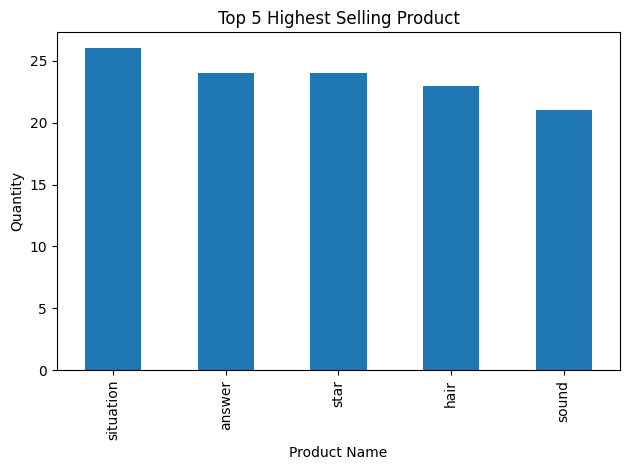

In [62]:
product_sales.nlargest(5).plot(kind='bar')
plt.title('Top 5 Highest Selling Product')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [63]:
category_avg_price = df.groupby('Category')['Price'].mean()
highest_avg_category = category_avg_price.idxmax()
highest_avg_price = category_avg_price.max()
print("Kategori produk dengan rata-rata harga tertinggi:", highest_avg_category, "dengan rata-rata:", highest_avg_price)

Kategori produk dengan rata-rata harga tertinggi: moment dengan rata-rata: 992.76


In [64]:
top5_category = category_avg_price.nlargest(5)

In [65]:
fig = px.bar(x=top5_category.index, y=top5_category.values, color=top5_category.values,
             labels={'x': 'Kategori', 'y': 'Rata-rata harga'})
fig.update_traces(text=top5_category.values, textposition='outside')
fig.update_layout(title='Top 5 Kategori Produk dengan Rata-rata Harga Tertinggi')
fig.show()

In [66]:
# Tren penjualan dari bulan ke bulan
df['Month'] = df['Order_Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Order_ID'].count()
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_sales_ordered = monthly_sales.reindex(month_order)
monthly_sales_ordered

Month
January       62
February      48
March         56
April         49
May           48
June         127
July          50
August        51
September     38
October       58
November      57
December      44
Name: Order_ID, dtype: int64

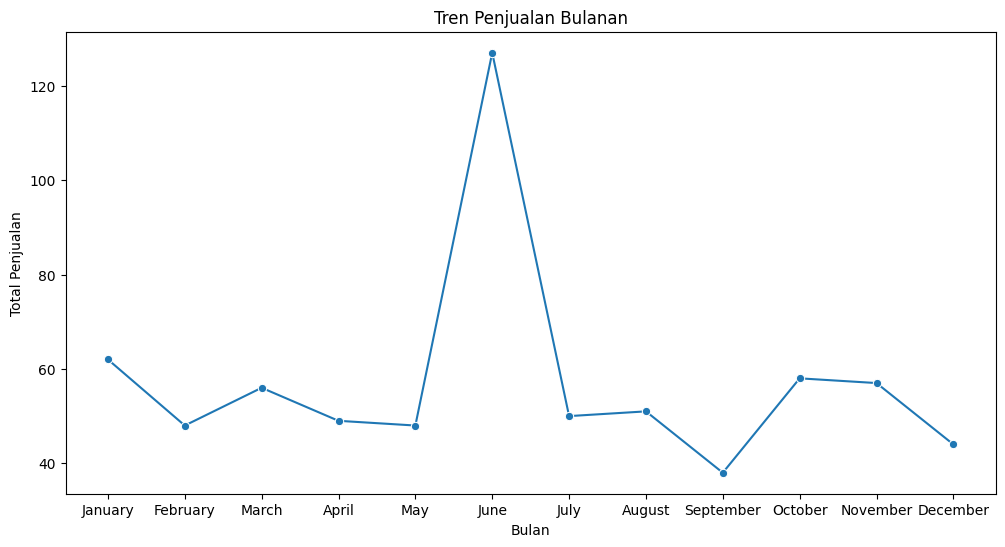

In [67]:
plt.figure(figsize=(12, 6))  
sns.lineplot(x=monthly_sales_ordered.index, y=monthly_sales_ordered.values, marker='o')  
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.show()

In [68]:
# Pola penjualan pada hari-hari tertentu dalam seminggu
df['Day_of_Week'] = df['Order_Date'].dt.day_name()
weekly_sales = df.groupby('Day_of_Week')['Order_ID'].count()
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekly_sales_ordered = weekly_sales.reindex(weekday_order)
weekly_sales_ordered

Day_of_Week
Sunday       101
Monday       102
Tuesday      144
Wednesday     86
Thursday      87
Friday        95
Saturday      73
Name: Order_ID, dtype: int64

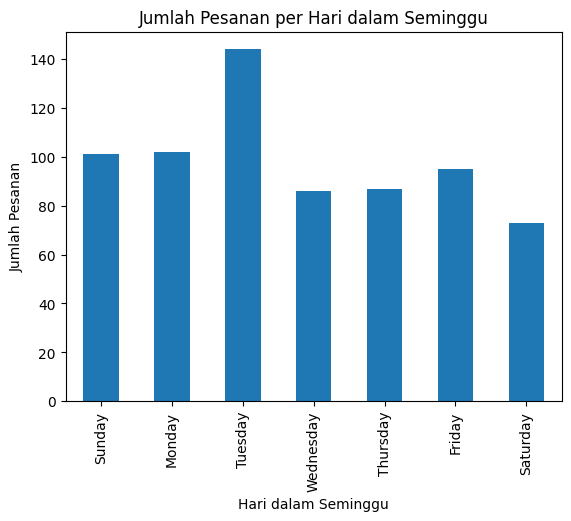

In [69]:
weekly_sales_ordered.plot(kind='bar', title='Jumlah Pesanan per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pesanan')
plt.show()

Dari data jumlah pesanan berdasarkan hari dalam seminggu, kita melihat bahwa hari dengan pesanan terbanyak adalah Selasa. Hal ini menunjukkan bahwa aktivitas bisnis cenderung meningkat pada awal minggu kerja. Sebaliknya, hari dengan pesanan terendah adalah Sabtu, mengindikasikan akhir pekan mungkin lebih tenang. Aktivitas bisnis yang tinggi pada hari Selasa bisa memerlukan tambahan staf atau persediaan, sementara penurunan pada Sabtu mungkin bisa diatasi dengan promosi khusus untuk mendorong lebih banyak penjualan. Pola ini juga menunjukkan bahwa Senin dan Minggu memiliki tingkat pesanan yang cukup tinggi, mungkin karena konsumen yang memulai minggu kerja atau berbelanja sebelum akhir pekan berakhir. Dengan memahami tren ini, bisnis dapat mengoptimalkan sumber daya dan strategi pemasaran sesuai kebutuhan.

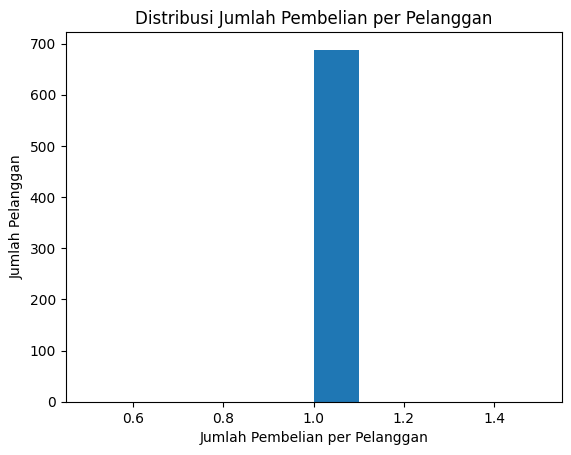

In [70]:
# Distribusi jumlah pembelian per pelanggan
customer_purchase = df.groupby('Customer_ID')['Order_ID'].count()
plt.hist(customer_purchase)
plt.xlabel("Jumlah Pembelian per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Pembelian per Pelanggan")
plt.show()

In [71]:
customer_purchase.describe()

count    688.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Order_ID, dtype: float64

Berdasarkan distribusi jumlah pembelian per pelanggan dapat disimpulkan bahwa setiap pelanggan hanya memiliki satu pesanan, tanpa variasi. Dengan 688 pelanggan, rata-rata pembelian adalah 1, dengan standar deviasi, median, serta nilai minimum dan maksimum juga menunjukkan angka 1. Hal ini mengindikasikan bahwa pelanggan hanya melakukan satu pembelian, dan tidak ada pelanggan yang melakukan pembelian lebih dari satu kali. Situasi ini dapat menunjukkan kurangnya loyalitas pelanggan yang mengakibatkan rendahnya pembelian berulang. Perlu adanya strategi baru seperti program loyalitas, promosi khusus, atau pendekatan pemasaran untuk mendorong pelanggan kembali. Peluang ini dapat dimanfaatkan untuk meningkatkan frekuensi pembelian dan pada akhirnya akan meningkatkan pendapatan bisnis. 

In [72]:
# Metode pembayaran yang paling sering digunakan
payment_method_count = df['Payment_Method'].value_counts()
payment_method_count

Payment_Method
Cash           211
Credit Card    209
PayPal         188
Unknown         80
Name: count, dtype: int64

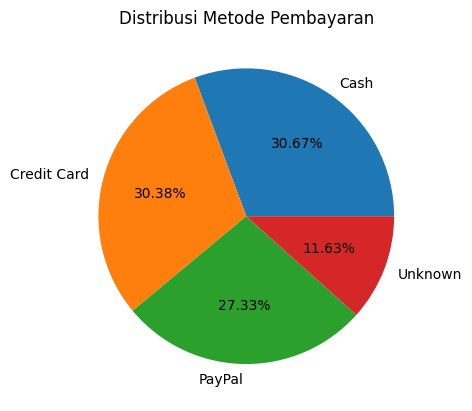

In [73]:
plt.pie(payment_method_count, labels=payment_method_count.index, autopct='%.2f%%')
plt.title("Distribusi Metode Pembayaran")
plt.show()

In [74]:
# Korelasi antara metode pembayaran dan total belanja
df['Total_Purchase'] = df['Price'] * df['Quantity']
payment_total_spent = df.groupby('Payment_Method')['Total_Purchase'].mean()
payment_total_spent

Payment_Method
Cash           2800.142417
Credit Card    3029.554545
PayPal         2583.064521
Unknown        2503.627750
Name: Total_Purchase, dtype: float64

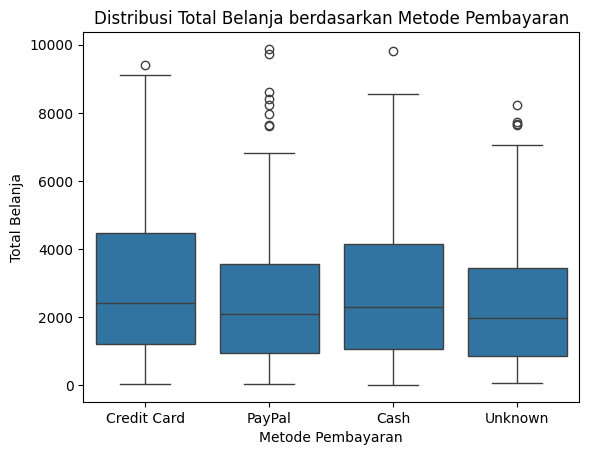

In [75]:
sns.boxplot(x='Payment_Method', y='Total_Purchase', data=df)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Belanja')
plt.title('Distribusi Total Belanja berdasarkan Metode Pembayaran')
plt.show()

In [76]:
# Uji ANOVA untuk melihat apakah perbedaan rata-rata total belanja signifikan
anova_result = stats.f_oneway(
    df[df['Payment_Method'] == 'Credit Card']['Total_Purchase'],
    df[df['Payment_Method'] == 'PayPal']['Total_Purchase'],
    df[df['Payment_Method'] == 'Cash']['Total_Purchase'],
    df[df['Payment_Method'] == 'Unknown']['Total_Purchase']
)

print("Hasil uji ANOVA:", anova_result)

Hasil uji ANOVA: F_onewayResult(statistic=1.8699072699130908, pvalue=0.13330049713018136)


Hasil uji ANOVA yang menunjukkan nilai statistik 1.870902473137526 dan nilai p-value 0.13312983550665913 memberikan wawasan tentang apakah ada perbedaan signifikan dalam rata-rata total belanja berdasarkan metode pembayaran yang berbeda.

Nilai Statistik: Nilai statistik ANOVA menunjukkan sejauh mana variasi dalam data dapat dijelaskan oleh perbedaan antara kelompok (dalam hal ini, metode pembayaran). Nilai yang lebih tinggi biasanya menunjukkan perbedaan yang lebih signifikan antara kelompok.

P-Value: P-value adalah indikator penting dalam uji statistik. Ini mengukur probabilitas bahwa hasil yang diamati terjadi secara acak jika asumsi dasar bahwa tidak ada perbedaan (hipotesis nol) benar. Semakin rendah p-value, semakin kecil kemungkinan hasil yang diamati adalah karena kebetulan.

P-Value > 0.05: Dalam analisis statistik, batas p-value yang umum digunakan adalah 0.05. Jika p-value lebih besar dari 0.05, seperti dalam hasil di atas (0.13312983550665913), ini menunjukkan bahwa perbedaan rata-rata total belanja antara metode pembayaran tidak signifikan secara statistik. Artinya, kita tidak memiliki cukup bukti untuk menolak hipotesis nol, yang menyatakan bahwa tidak ada perbedaan rata-rata total belanja antara metode pembayaran yang berbeda.

Kesimpulan: Karena p-value lebih besar dari 0.05, kita tidak dapat menyimpulkan bahwa ada korelasi yang signifikan antara metode pembayaran dan total belanja. Hasil ini menunjukkan bahwa variasi rata-rata total belanja di antara metode pembayaran mungkin disebabkan oleh faktor acak atau variasi alami, dan bukan karena efek yang signifikan dari metode pembayaran.

In [77]:
# Menentukan batas waktu pengiriman (misalnya, 3 hari setelah dipesan)
deadline = df['Order_Date'] + pd.Timedelta(days=3)

In [78]:
df['Late'] = df['Delivery_Date'] > deadline #kolom untuk menunjukkan apakah pesanan terlambat

In [79]:
late_count = df['Late'].sum()
total_orders = df.shape[0]
late_percentage = (late_count / total_orders) * 100
print(f"Persentase pesanan yang terlambat: {late_percentage:.2f}%")


Persentase pesanan yang terlambat: 60.76%


In [80]:
late_by_category = df.groupby('Category')['Late'].mean() * 100

print("Persentase keterlambatan berdasarkan kategori produk:")
print(late_by_category.map('{:.2f}%'.format))

Persentase keterlambatan berdasarkan kategori produk:
Category
American      100.00%
Congress      100.00%
PM            100.00%
Republican      0.00%
TV            100.00%
               ...   
year            0.00%
yes            66.67%
yet            50.00%
you            50.00%
your          100.00%
Name: Late, Length: 453, dtype: object


In [81]:
top_10_highest = late_by_category.nlargest(10)
top_10_highest

Category
American          100.0
Congress          100.0
PM                100.0
TV                100.0
according         100.0
account           100.0
across            100.0
act               100.0
administration    100.0
after             100.0
Name: Late, dtype: float64

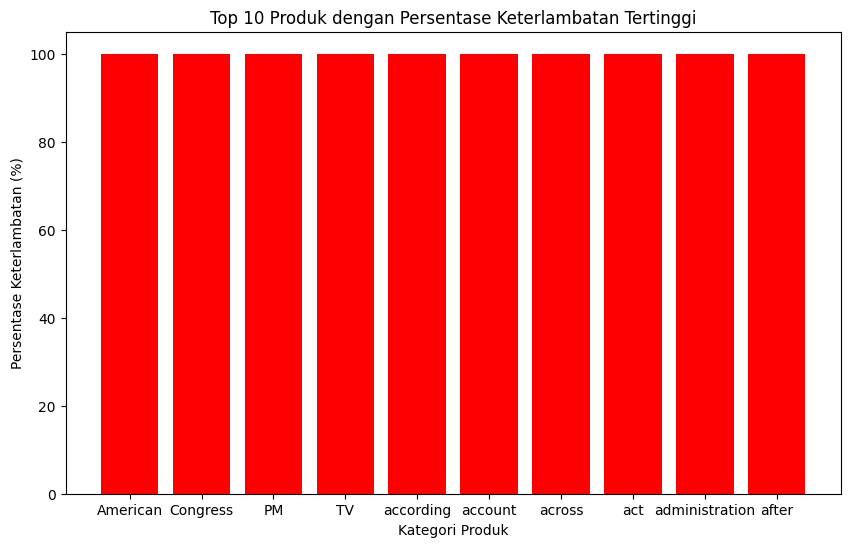

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest.index, top_10_highest.values, color='red')  
plt.xlabel('Kategori Produk')
plt.ylabel('Persentase Keterlambatan (%)')
plt.title('Top 10 Produk dengan Persentase Keterlambatan Tertinggi')
plt.show()

Produk yang mengalami tingkat keterlambatan yang tinggi mungkin mengindikasikan adanya masalah dalam proses logistik, rantai pasokan, atau manajemen pengiriman. Penyebabnya bisa bermacam-macam, mulai dari masalah dalam rantai pasokan hingga kendala dalam logistik. Untuk mengatasinya, strategi yang efektif meliputi analisis akar masalah, peningkatan kerjasama dengan pemasok, dan optimalisasi sistem logistik. Dengan mengambil tindakan yang tepat, bisnis dapat memperbaiki efisiensi pengiriman, meningkatkan kepuasan pelanggan, dan memperbaiki reputasi.